In [ ]:
from pandas import read_csv
from pandas import set_option
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot

# Nouvelle section

In [ ]:

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B','LSTAT','MEDV']
dataset= pd.read_csv("/housing.csv",delim_whitespace=True,names=names)




FileNotFoundError: ignored

In [ ]:
df= dataset.copy()
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [ ]:
peek= df.shape
peek

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [ ]:
df.head(20)

NameError: ignored

In [ ]:
set_option=('precision',1)
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
print(df.corr(method='pearson'))

             CRIM        ZN     INDUS  ...         B     LSTAT      MEDV
CRIM     1.000000 -0.200469  0.406583  ... -0.385064  0.455621 -0.388305
ZN      -0.200469  1.000000 -0.533828  ...  0.175520 -0.412995  0.360445
INDUS    0.406583 -0.533828  1.000000  ... -0.356977  0.603800 -0.483725
CHAS    -0.055892 -0.042697  0.062938  ...  0.048788 -0.053929  0.175260
NOX      0.420972 -0.516604  0.763651  ... -0.380051  0.590879 -0.427321
RM      -0.219247  0.311991 -0.391676  ...  0.128069 -0.613808  0.695360
AGE      0.352734 -0.569537  0.644779  ... -0.273534  0.602339 -0.376955
DIS     -0.379670  0.664408 -0.708027  ...  0.291512 -0.496996  0.249929
RAD      0.625505 -0.311948  0.595129  ... -0.444413  0.488676 -0.381626
TAX      0.582764 -0.314563  0.720760  ... -0.441808  0.543993 -0.468536
PTRATIO  0.289946 -0.391679  0.383248  ... -0.177383  0.374044 -0.507787
B       -0.385064  0.175520 -0.356977  ...  1.000000 -0.366087  0.333461
LSTAT    0.455621 -0.412995  0.603800  ... -0.36608

[]

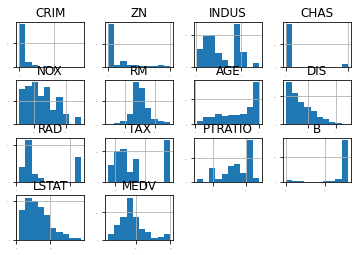

In [ ]:
df.hist(sharex=False,sharey=False,xlabelsize=1,ylabelsize=1)
plt.plot()

In [ ]:
#Split-out validation dataset
array= df.values
X=array[:,0:13]
Y=array[:,13]
validation_size=0.2
seed=7
X_train , X_validation ,Y_train,Y_validation= train_test_split(X, Y, 
                                                               test_size = validation_size, random_state=seed)

In [ ]:
#Tests option and evaluation metrics
num_folds = 10
seed=7
scoring='neg_mean_squared_error'

In [ ]:
#Spot-check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO',Lasso()))
models.append(('EN',ElasticNet()))
models.append(('KNN',KNeighborsRegressor()))
models.append(('CART',DecisionTreeRegressor()))
models.append(('SVR',SVR()))


In [ ]:
#evaluate  each model in turn
results = []
names = []
for name, model in models:
  kfold = KFold(n_splits=num_folds, random_state=seed)

  cv_results = cross_val_score(model, X_train, Y_train, cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)

  msg="%s: %f  (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)  


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

LR: -21.379856  (9.414264)
LASSO: -26.423561  (11.651110)
EN: -27.502259  (12.305022)
KNN: -41.896488  (13.901688)
CART: -24.425332  (10.540360)
SVR: -67.827886  (29.049138)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


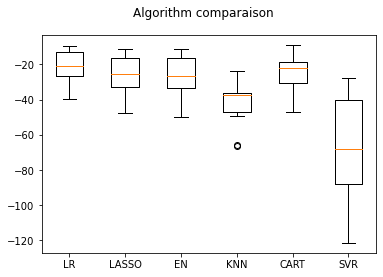

In [ ]:
fig= pyplot.figure()
fig.suptitle('Algorithm comparaison')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()


In [ ]:
#standarize datatset
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler', StandardScaler()), ('LR',
         LinearRegression())])))      
pipelines.append(('ScaledLASSO', Pipeline([('Scaler', StandardScaler()), ('LASSO',
         Lasso())])))   
pipelines.append(('ScaledER', Pipeline([('Scaler', StandardScaler()), ('ER',
         ElasticNet())])))  
pipelines.append(('ScaledKNN', Pipeline([('Scaler', StandardScaler()), ('KNN',
         KNeighborsRegressor())])))  
pipelines.append(('ScaledCART', Pipeline([('Scaler', StandardScaler()), ('CART',
         DecisionTreeRegressor())]))) 
pipelines.append(('ScaledVR', Pipeline([('Scaler', StandardScaler()), ('SVR',
         SVR())])))               
results = [] 
names = []    
for name, model in pipelines:
  kfold= KFold(n_splits=num_folds, random_state=seed)
  cv_results= cross_val_score(model, X_train,Y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg="%s: %f  (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)  







/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

ScaledLR: -21.379856  (9.414264)
ScaledLASSO: -26.607314  (8.978761)
ScaledER: -27.932372  (10.587490)
ScaledKNN: -20.107620  (12.376949)
ScaledCART: -21.851789  (7.283945)
ScaledVR: -29.633086  (17.009186)


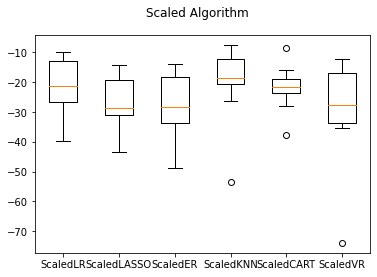

In [ ]:
#compare algorithm
fig= pyplot.figure()
fig.suptitle('Scaled Algorithm')
ax=fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()




In [ ]:
#KNN Algorithm tunning

scaler= StandardScaler().fit(X_train)
rescaledx= scaler.transform(X_train)
k_values=np.array([1,3,5,7,9,11,13,15,17,19,21])
param_grid= dict(n_neighbors=k_values)
model=KNeighborsRegressor()
kfold= KFold(n_splits=num_folds,random_state=seed)
grid= GridSearchCV(estimator=model, param_grid=param_grid,scoring=scoring, cv=kfold)
grid_results=grid.fit(rescaledx, Y_train)











/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print("Best:%f using %s" %(grid_results.best_score_, grid_results.best_params_))
means=grid_results.cv_results_['mean_test_score']
stds= grid_results.cv_results_['std_test_score']
params=grid_results.cv_results_['params']
for mean,stdev,param in zip(means,stds,params):
  print("%f (%f) with: %r" % (mean, stdev, param))



Best:-18.109304 using {'n_neighbors': 3}
-20.169640 (14.986904) with: {'n_neighbors': 1}
-18.109304 (12.880861) with: {'n_neighbors': 3}
-20.063115 (12.138331) with: {'n_neighbors': 5}
-20.514297 (12.278136) with: {'n_neighbors': 7}
-20.319536 (11.554509) with: {'n_neighbors': 9}
-20.963145 (11.540907) with: {'n_neighbors': 11}
-21.099040 (11.870962) with: {'n_neighbors': 13}
-21.506843 (11.468311) with: {'n_neighbors': 15}
-22.739137 (11.499596) with: {'n_neighbors': 17}
-23.829011 (11.277558) with: {'n_neighbors': 19}
-24.320892 (11.849667) with: {'n_neighbors': 21}


In [ ]:
#ensembles with technics bagging boosting
ensembles=[]
ensembles.append(('ScaledAB', Pipeline([('Scaler',StandardScaler()),('AB',
AdaBoostRegressor())])) )
ensembles.append(('ScaledGBM',Pipeline([('Scaler',StandardScaler()),('GBM',
GradientBoostingRegressor())])))
ensembles.append(('ScaledAB', Pipeline([('Scaler',StandardScaler()),('RF',
RandomForestRegressor())])) )
ensembles.append(('ScaledAB', Pipeline([('Scaler',StandardScaler()),('ET',
ExtraTreesRegressor())])) )




In [ ]:
results =[]
names = []
for name, model in models:
  kfold= KFold(n_splits=num_folds,random_state=seed)
  cv_results = cross_val_score(model,X_train,Y_train, cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s : %f (%f)" %(name,cv_results.mean(),cv_results.std())
  print(msg)



LR : -21.379856 (9.414264)
LASSO : -26.423561 (11.651110)
EN : -27.502259 (12.305022)
KNN : -41.896488 (13.901688)
CART : -26.351663 (12.225597)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will ra

SVR : -67.827886 (29.049138)


In [ ]:
#Tune scaled 
scaler= StandardScaler().fit(X_train)
rescaledx=scaler.transform(X_train)
param_grid = dict(n_estimators=np.array([50,100,150,200,20,300,350,400]))
model = GradientBoostingRegressor(random_state=seed)
kfold=KFold(n_splits=num_folds,random_state=seed)
grid= GridSearchCV(estimator=model,param_grid=param_grid, scoring=scoring,cv=kfold)
grid_result = grid.fit(rescaledx, Y_train)




/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [ ]:
print("Best: %f using %s"  % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print( "%f (%f) with: %r"  % (mean, stdev, param))
 

Best: -9.379670 using {'n_estimators': 400}
-10.813179 (4.856738) with: {'n_estimators': 50}
-10.057375 (4.566986) with: {'n_estimators': 100}
-9.718097 (4.404730) with: {'n_estimators': 150}
-9.565306 (4.394355) with: {'n_estimators': 200}
-14.373126 (5.582855) with: {'n_estimators': 20}
-9.453795 (4.385228) with: {'n_estimators': 300}
-9.394901 (4.367860) with: {'n_estimators': 350}
-9.379670 (4.382001) with: {'n_estimators': 400}


In [ ]:
#prepare model
scaler = StandardScaler().fit(X_train)
rescalex= scaler.fit_transform(X_train)
model=GradientBoostingRegressor(random_state=seed)
model.fit(rescaledx, Y_train)


GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=7, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
#transform data
rescaledValidationX= scaler.transform(X_validation)
predictions=model.predict(rescaledValidationX)
print(mean_squared_error(Y_validation,predictions))

10.796849099521383
